In [10]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [11]:
dataset = pd.read_csv('/home/sam/Downloads/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
dataset.shape

(1338, 7)

In [13]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


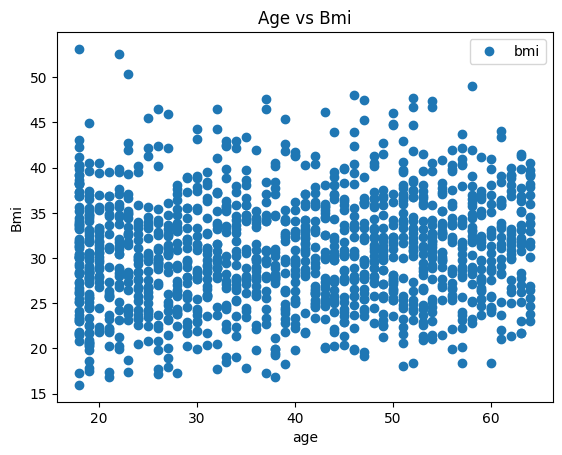

In [14]:
dataset.plot(x='age', y='bmi', style='o')  
plt.title('Age vs Bmi')  
plt.xlabel('age')  
plt.ylabel('Bmi')  
plt.show()

<AxesSubplot: xlabel='charges', ylabel='Count'>

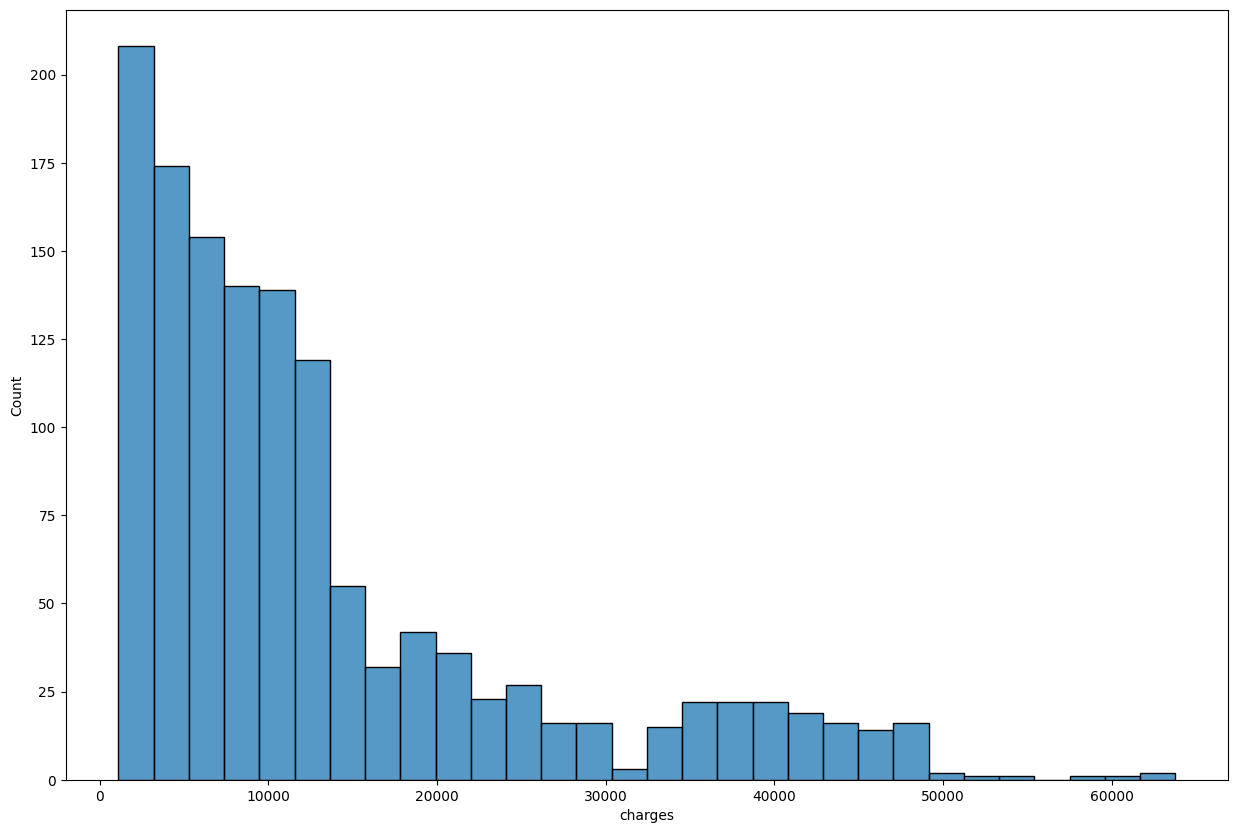

In [17]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.histplot(dataset['charges'])

In [18]:
X = dataset['charges'].values.reshape(-1,1)
y = dataset['bmi'].values.reshape(-1,1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print(regressor.intercept_)
print(regressor.coef_)

[29.47078153]
[[9.52395427e-05]]


In [22]:
y_pred = regressor.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,30.200,30.396941
1,29.370,30.284860
2,40.565,33.823421
3,38.380,30.704140
4,18.050,30.389296
...,...,...
263,30.495,30.901257
264,28.405,30.105523
265,40.280,31.443099
266,39.050,33.369167


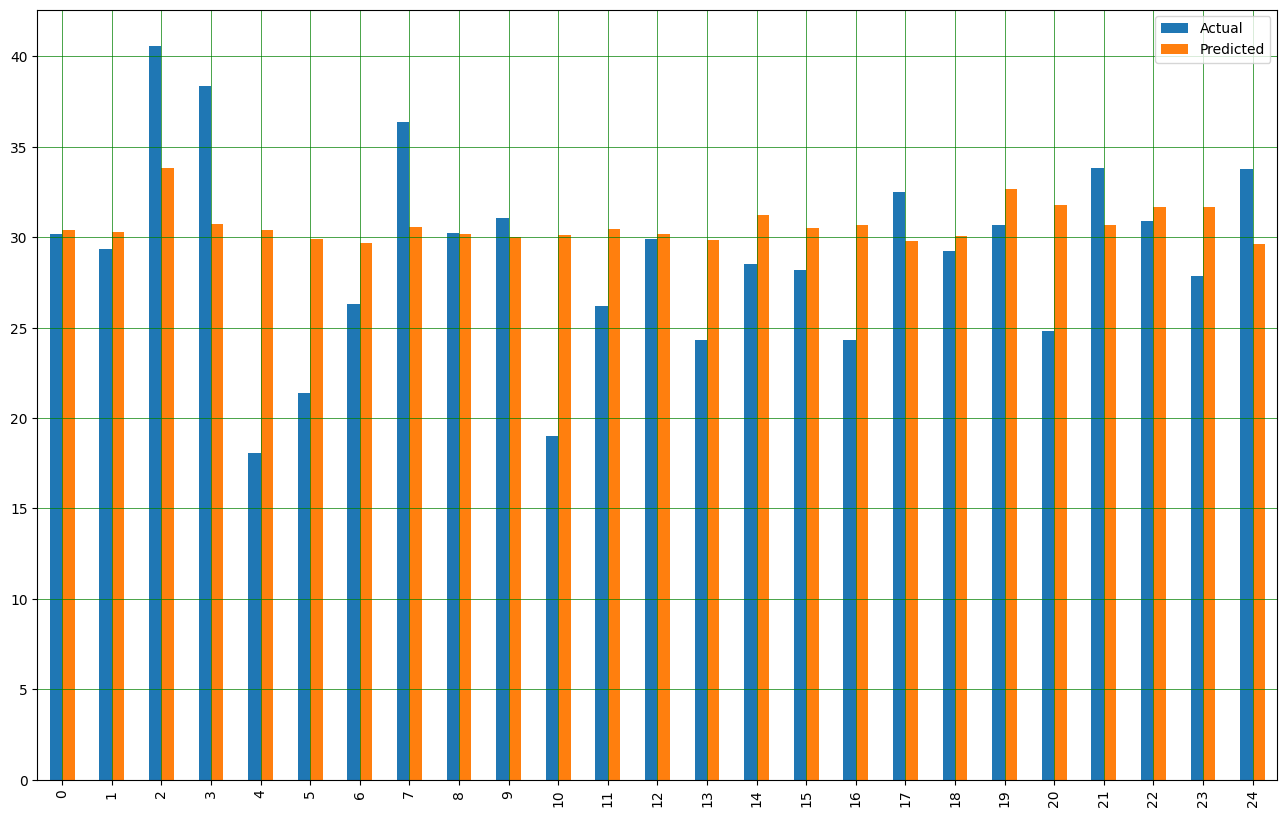

In [24]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

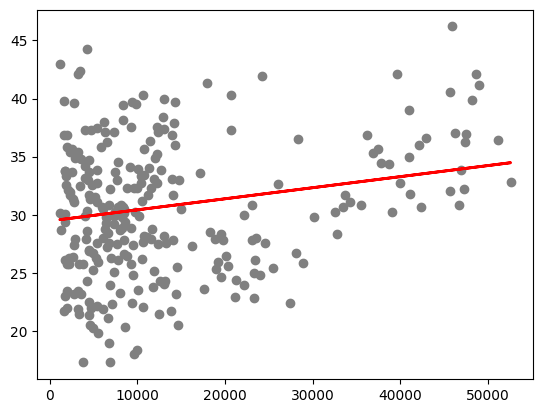

In [25]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.567921147244272
Mean Squared Error: 30.795815075694932
Root Mean Squared Error: 5.549397721887929
